In [1]:
import os
import numpy as np
import pickle
from helpers.SimulationAnalysis import SimulationAnalysis, readHlist
import matplotlib.pylab as plt


#......new imports (helper class)
import sys
sys.path.insert(0, '../scripts') # adding to the system path
from hlistHelper import hlist


%matplotlib inline
%config InlineBackend.figure_format='retina'
%config InlineBackend.rc = {'figure.facecolor': 'w'}
# plt.rc("text", usetex=True)
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = 'cm'
custom_blues_complement = ["#FFBB99", "#FF9966", "#FF7733", "#FF5500", "#CC4400", "#993300", "#662200","#000000"]

sim_colors = {}
sim_colors['cdm'] = 'k'
sim_colors['wdm_3'] = custom_blues_complement[0]
sim_colors['wdm_4'] = custom_blues_complement[1]
sim_colors['wdm_5'] = custom_blues_complement[2]
sim_colors['wdm_6'] = custom_blues_complement[3]
sim_colors['wdm_6.5'] = custom_blues_complement[4]
sim_colors['wdm_10'] = custom_blues_complement[5]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
with open("../data/sim_data.bin", "rb") as f:
    sim_data = pickle.load(f, encoding='latin1')

#...... cold dark matter
model = 'cdm'
halo_id = 'Halo004'

cdm = hlist(halo_id='', model=model, on_cluster=False)
cdm.load_hlists()
cdm.hmb = sim_data[halo_id][model][0]

#...... warm dark matter, 3 keV
model = 'wdm_3'
wdm = hlist(halo_id='', model=model, on_cluster=False)
wdm.load_hlists()
wdm.hmb = sim_data[halo_id][model][0]

Text(0.5, 0.92, 'CDM Subhalo Distribution, Halo 004')

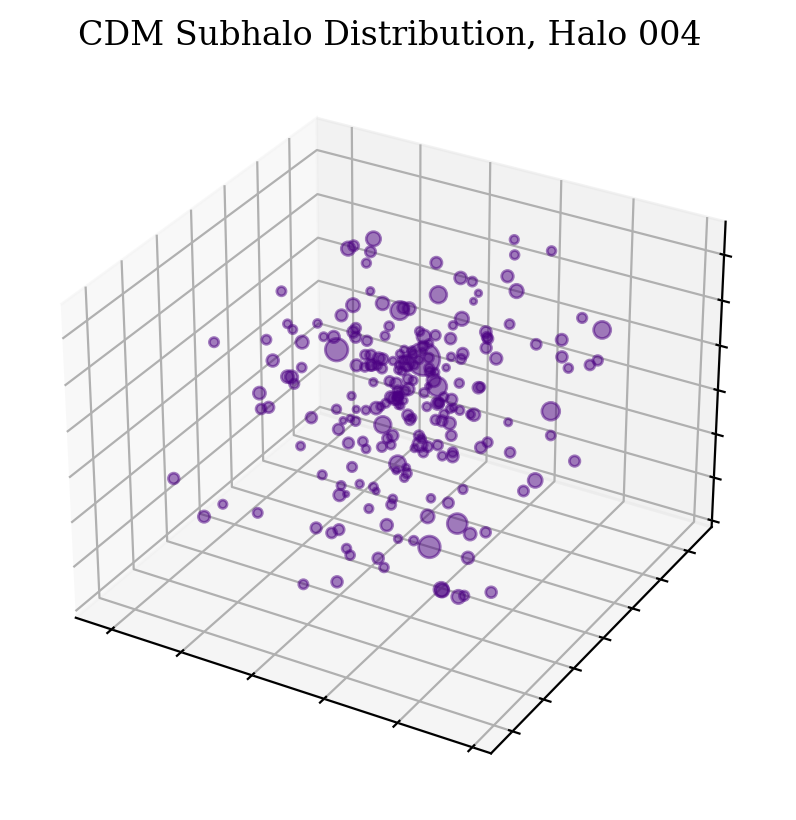

In [22]:
from mpl_toolkits import mplot3d
halos, subhalos = cdm.get_z(0)

mass_cut = subhalos['Mpeak']/0.7 > 1.2e8

x = subhalos[mass_cut]['x']
y = subhalos[mass_cut]['y']
z = subhalos[mass_cut]['z']

ax = plt.figure().add_subplot(projection='3d')
ax.scatter3D(x,y,z, s = subhalos[mass_cut]['Rvir']/0.7, c='indigo', alpha=0.5)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.set_title('CDM Subhalo Distribution, Halo 004')

Text(0.5, 0.92, '$WDM_3$ Subhalo Distribution, Halo 004')

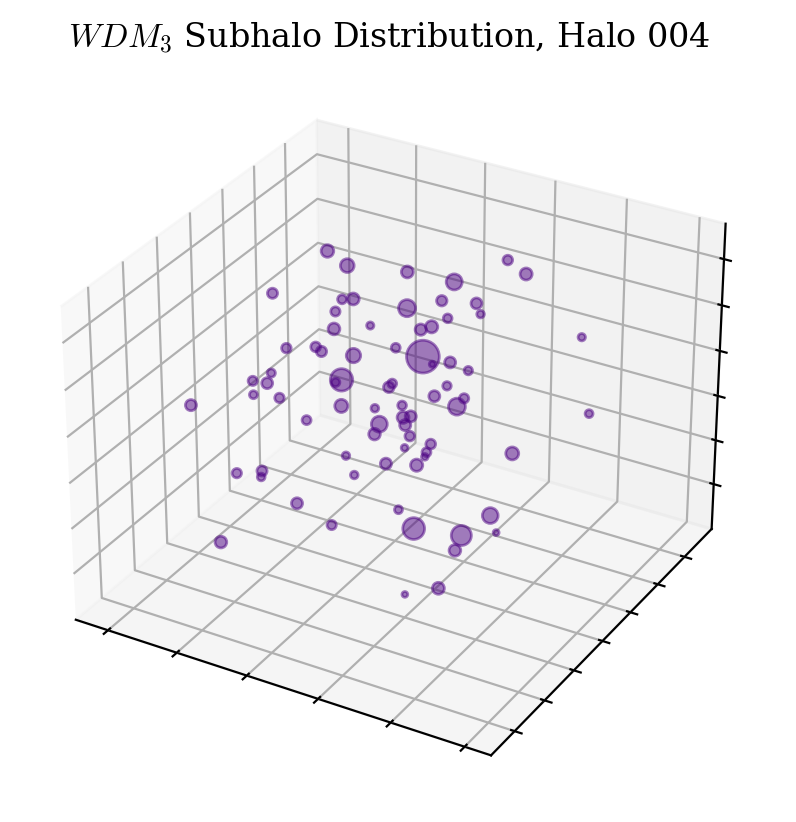

In [23]:
halos_wdm, subhalos_wdm = wdm.get_z(0)

mass_cut_wdm = subhalos_wdm['Mpeak']/0.7 > 1.2e8

x = subhalos_wdm[mass_cut_wdm]['x']
y = subhalos_wdm[mass_cut_wdm]['y']
z = subhalos_wdm[mass_cut_wdm]['z']

ax = plt.figure().add_subplot(projection='3d')
ax.scatter3D(x,y,z, s = subhalos_wdm[mass_cut_wdm]['Rvir']/0.7, c='indigo', alpha=0.5)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.set_title(r'$WDM_3$ Subhalo Distribution, Halo 004')